In [76]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor

In [77]:
merged_df = pd.read_csv('/content/Agmarknet - Sheet1 (1).csv')

In [78]:
merged_df.head()

,Date,Commodity,State,District,Market,Total_Arrival,Population,MinPrice,MaxPrice,ModalPrice
0,01-Jan-2023,Onion,Karnataka,Bangalore,0,"0,0",13.606.753,NaN,NaN,NaN
1,02-Jan-2023,Onion,Karnataka,Bangalore,0,"2983,0",13.606.753,500.0,1000.0,700.0
2,03-Jan-2023,Onion,Karnataka,Bangalore,0,"5420,0",13.606.753,500.0,800.0,700.0
3,04-Jan-2023,Onion,Karnataka,Bangalore,0,"7619,0",13.606.753,500.0,800.0,700.0
4,05-Jan-2023,Onion,Karnataka,Bangalore,0,"9881,0",13.606.753,500.0,800.0,700.0


In [79]:
merged_df['Date']

0       01-Jan-2023
1       02-Jan-2023
2       03-Jan-2023
3       04-Jan-2023
4       05-Jan-2023
           ...     
2881    21-Apr-2024
2882    22-Apr-2024
2883    23-Apr-2024
2884    24-Apr-2024
2885    25-Apr-2024
Name: Date, Length: 2886, dtype: object

In [80]:
merged_df['Total_Arrival'] = merged_df['Total_Arrival'].str.replace(',','').astype(int)

In [81]:
merged_df['Total_Arrival'] = merged_df['Total_Arrival']/10

In [82]:
import pandas as pd

# Assuming merged_df is your DataFrame containing the dataset

# Convert Date column to datetime format using the correct format
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d-%b-%Y')

def get_average_total_arrival(date_str, state, district):
    input_date = pd.to_datetime(date_str, format='%d-%b-%Y')

    # Filter the dataset based on input date, state, and district
    filtered_df = merged_df[(merged_df['Date'].dt.month == input_date.month) &
                             (merged_df['Date'].dt.year == input_date.year) &
                             (merged_df['State'] == state) &
                             (merged_df['District'] == district)]

    if filtered_df.empty:
        # If no exact match for input date, go to the last available date in the dataset
        last_date_row = merged_df[merged_df['Date'] == merged_df['Date'].max()]
        filtered_df = merged_df[(merged_df['Date'].dt.month == last_date_row['Date'].dt.month.values[0]) &
                                 (merged_df['Date'].dt.year == last_date_row['Date'].dt.year.values[0]) &
                                 (merged_df['State'] == state) &
                                 (merged_df['District'] == district)]

    if not filtered_df.empty:
        # Calculate average of Total_Arrival for the entire month
        avg_total_arrival = filtered_df['Total_Arrival'].mean()
        return avg_total_arrival
    else:
        return None  # No data found for the input criteria

# Example usage
average_arrival_lucknow_april_2023 = get_average_total_arrival('25-Apr-2023', 'Uttar Pradesh', 'Lucknow')
print(average_arrival_lucknow_april_2023)


34994.455555555556


In [83]:
import pandas as pd

# Assuming merged_df is your DataFrame containing the dataset

# Convert Date column to datetime format using the correct format
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d-%b-%Y')

def get_modal_price(date_str, state, district, commodity):
    input_date = pd.to_datetime(date_str, format='%d-%b-%Y')

    # Filter the dataset based on input date, state, district, and commodity
    filtered_df = merged_df[(merged_df['Date'].dt.month == input_date.month) &
                             (merged_df['Date'].dt.year == input_date.year) &
                             (merged_df['State'] == state) &
                             (merged_df['District'] == district) &
                             (merged_df['Commodity'] == commodity)]

    if filtered_df.empty:
        # If no exact match for input date, go to the last available date in the dataset
        last_date_row = merged_df[merged_df['Date'] == merged_df['Date'].max()]
        filtered_df = merged_df[(merged_df['Date'].dt.month == last_date_row['Date'].dt.month.values[0]) &
                                 (merged_df['Date'].dt.year == last_date_row['Date'].dt.year.values[0]) &
                                 (merged_df['State'] == state) &
                                 (merged_df['District'] == district) &
                                 (merged_df['Commodity'] == commodity)]

    if not filtered_df.empty:
        # Get the ModalPrice for the filtered row
        print(filtered_df)
        modal_price = filtered_df['ModalPrice'].values[0]
        return modal_price
    else:
        return None  # No data found for the input criteria

# Example usage
modal_price_lucknow_potato_april_2023 = get_modal_price('25-Apr-2023', 'Uttar Pradesh', 'Lucknow', 'Potato')
print(modal_price_lucknow_potato_april_2023)


           Date Commodity          State District  Market  Total_Arrival  \
2014 2023-04-01    Potato  Uttar Pradesh  Lucknow       0        40924.5   
2015 2023-04-02    Potato  Uttar Pradesh  Lucknow       0        41404.5   
2016 2023-04-03    Potato  Uttar Pradesh  Lucknow       0        41684.5   
2017 2023-04-04    Potato  Uttar Pradesh  Lucknow       0        42064.5   
2018 2023-04-05    Potato  Uttar Pradesh  Lucknow       0        42459.5   
2019 2023-04-06    Potato  Uttar Pradesh  Lucknow       0        42859.5   
2020 2023-04-07    Potato  Uttar Pradesh  Lucknow       0        43279.5   
2021 2023-04-08    Potato  Uttar Pradesh  Lucknow       0        43659.5   
2022 2023-04-09    Potato  Uttar Pradesh  Lucknow       0        44119.5   
2023 2023-04-10    Potato  Uttar Pradesh  Lucknow       0        44519.5   
2024 2023-04-11    Potato  Uttar Pradesh  Lucknow       0        44899.5   
2025 2023-04-12    Potato  Uttar Pradesh  Lucknow       0        45269.5   
2026 2023-04

In [84]:
# Assuming the DataFrame is named merged_df and the column containing numbers with dots is 'Population'
merged_df['Population'] = merged_df['Population'].str.replace('.', '').astype(int)


In [85]:
merged_df['Total_Arrival'] = merged_df['Total_Arrival'].str.replace(',','').astype(int)

AttributeError: Can only use .str accessor with string values!

In [10]:
merged_df.head(5)

,Date,Commodity,State,District,Market,Total_Arrival,Population,MinPrice,MaxPrice,ModalPrice
0,01-Jan-2023,Onion,Karnataka,Bangalore,0,0,13606753,NaN,NaN,NaN
1,02-Jan-2023,Onion,Karnataka,Bangalore,0,29830,13606753,500.0,1000.0,700.0
2,03-Jan-2023,Onion,Karnataka,Bangalore,0,54200,13606753,500.0,800.0,700.0
3,04-Jan-2023,Onion,Karnataka,Bangalore,0,76190,13606753,500.0,800.0,700.0
4,05-Jan-2023,Onion,Karnataka,Bangalore,0,98810,13606753,500.0,800.0,700.0


In [11]:
for col in ['MinPrice', 'MaxPrice', 'ModalPrice']:
    # Calculate average of top and bottom values if present
    top_value = merged_df[col].dropna().iloc[-1] if not pd.isna(merged_df[col].iloc[-1]) else None
    bottom_value = merged_df[col].dropna().iloc[0] if not pd.isna(merged_df[col].iloc[0]) else None
    if top_value is not None and bottom_value is not None:
        average_value = (top_value + bottom_value) / 2
    else:
        average_value = top_value or bottom_value

    # Fill NaN values with the calculated average or a single value
    merged_df[col].fillna(average_value, inplace=True)


In [12]:
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.strftime('%Y-%m-%d')
merged_df['Commodity'] = merged_df['Commodity'].astype('category').cat.codes
merged_df['State'] = merged_df['State'].astype('category').cat.codes
merged_df['District'] = merged_df['District'].astype('category').cat.codes
merged_df['Market'] = merged_df['Market'].astype('category').cat.codes

# Display the encoded DataFrame
print(merged_df.head())

         Date  Commodity  State  District  Market  Total_Arrival  Population  \
0  2023-01-01          0      0         0       0              0    13606753   
1  2023-01-02          0      0         0       0          29830    13606753   
2  2023-01-03          0      0         0       0          54200    13606753   
3  2023-01-04          0      0         0       0          76190    13606753   
4  2023-01-05          0      0         0       0          98810    13606753   

   MinPrice  MaxPrice  ModalPrice  
0    1800.0    1900.0      1850.0  
1     500.0    1000.0       700.0  
2     500.0     800.0       700.0  
3     500.0     800.0       700.0  
4     500.0     800.0       700.0  


In [ ]:
# for i in migration.index:
#   if migration["Incoming"][i] == 0:
#     if(i%365 == 0):
#       migration["Incoming"][i] = migration["Incoming"][i+1]
#     elif i%365 == 364:
#       migration["Incoming"][i] = migration["Incoming"][i-1]
#     else:
#       migration["Incoming"][i] = (migration["Incoming"][i+1] + migration["Incoming"][i-1])/2

In [ ]:
# for i in migration.index:
#   if migration["Outgoing"][i] == 0:
#     if(i%365 == 0):
#       migration["Outgoing"][i] = migration["Outgoing"][i+1]
#     elif i%365 == 364:
#       migration["Outgoing"][i] = migration["Outgoing"][i-1]
#     else:
#       migration["Outgoing"][i] = (migration["Outgoing"][i+1] + migration["Outgoing"][i-1])/2

Models

In [13]:
merged_df = merged_df.drop(['Date'], axis=1)
merged_df

,Commodity,State,District,Market,Total_Arrival,Population,MinPrice,MaxPrice,ModalPrice
0,0,0,0,0,0,13606753,1800.0,1900.0,1850.0
1,0,0,0,0,29830,13606753,500.0,1000.0,700.0
2,0,0,0,0,54200,13606753,500.0,800.0,700.0
3,0,0,0,0,76190,13606753,500.0,800.0,700.0
4,0,0,0,0,98810,13606753,500.0,800.0,700.0
...,...,...,...,...,...,...,...,...,...
2881,2,1,1,0,433295,4038000,1800.0,1900.0,1850.0
2882,2,1,1,0,433665,4038000,1850.0,1950.0,1900.0
2883,2,1,1,0,434185,4038000,1850.0,1950.0,1900.0
2884,2,1,1,0,434785,4038000,1800.0,1900.0,1850.0


In [14]:
x_data = merged_df[['Commodity','State','District','Market','Population','MinPrice','MaxPrice','Total_Arrival']]
y_data = merged_df['ModalPrice']

In [15]:
print(x_data)

      Commodity  State  District  Market  Population  MinPrice  MaxPrice  \
0             0      0         0       0    13606753    1800.0    1900.0   
1             0      0         0       0    13606753     500.0    1000.0   
2             0      0         0       0    13606753     500.0     800.0   
3             0      0         0       0    13606753     500.0     800.0   
4             0      0         0       0    13606753     500.0     800.0   
...         ...    ...       ...     ...         ...       ...       ...   
2881          2      1         1       0     4038000    1800.0    1900.0   
2882          2      1         1       0     4038000    1850.0    1950.0   
2883          2      1         1       0     4038000    1850.0    1950.0   
2884          2      1         1       0     4038000    1800.0    1900.0   
2885          2      1         1       0     4038000    1800.0    1900.0   

      Total_Arrival  
0                 0  
1             29830  
2             54200  

Support Vector Regression

In [16]:
merged_df

,Commodity,State,District,Market,Total_Arrival,Population,MinPrice,MaxPrice,ModalPrice
0,0,0,0,0,0,13606753,1800.0,1900.0,1850.0
1,0,0,0,0,29830,13606753,500.0,1000.0,700.0
2,0,0,0,0,54200,13606753,500.0,800.0,700.0
3,0,0,0,0,76190,13606753,500.0,800.0,700.0
4,0,0,0,0,98810,13606753,500.0,800.0,700.0
...,...,...,...,...,...,...,...,...,...
2881,2,1,1,0,433295,4038000,1800.0,1900.0,1850.0
2882,2,1,1,0,433665,4038000,1850.0,1950.0,1900.0
2883,2,1,1,0,434185,4038000,1850.0,1950.0,1900.0
2884,2,1,1,0,434785,4038000,1800.0,1900.0,1850.0


**Deep** **Learning** **Models**

In [17]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state=9)

In [19]:
x_data

,Commodity,State,District,Market,Population,MinPrice,MaxPrice,Total_Arrival
0,0,0,0,0,13606753,1800.0,1900.0,0
1,0,0,0,0,13606753,500.0,1000.0,29830
2,0,0,0,0,13606753,500.0,800.0,54200
3,0,0,0,0,13606753,500.0,800.0,76190
4,0,0,0,0,13606753,500.0,800.0,98810
...,...,...,...,...,...,...,...,...
2881,2,1,1,0,4038000,1800.0,1900.0,433295
2882,2,1,1,0,4038000,1850.0,1950.0,433665
2883,2,1,1,0,4038000,1850.0,1950.0,434185
2884,2,1,1,0,4038000,1800.0,1900.0,434785


In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
model = Sequential()
# model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(128, input_dim=8, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9473 (37.00 KB)
Trainable params: 9473 (37.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
history = model.fit(x_train_scaled, y_train, epochs =100, validation_data=(x_test_scaled, y_test))

Epoch 1/100
68/68 [==============================] - 1s 7ms/step - loss: 4851325.0000 - mse: 4851325.0000 - val_loss: 4574401.0000 - val_mse: 4574401.0000
Epoch 2/100
68/68 [==============================] - 0s 4ms/step - loss: 4664265.0000 - mse: 4664265.0000 - val_loss: 4206969.5000 - val_mse: 4206969.5000
Epoch 3/100
68/68 [==============================] - 0s 4ms/step - loss: 3957351.7500 - mse: 3957351.7500 - val_loss: 3187130.2500 - val_mse: 3187130.2500
Epoch 4/100
68/68 [==============================] - 0s 3ms/step - loss: 2614328.2500 - mse: 2614328.2500 - val_loss: 1681243.5000 - val_mse: 1681243.5000
Epoch 5/100
68/68 [==============================] - 0s 3ms/step - loss: 1140824.3750 - mse: 1140824.3750 - val_loss: 571954.9375 - val_mse: 571954.9375
Epoch 6/100
68/68 [==============================] - 0s 3ms/step - loss: 356600.4688 - mse: 356600.4688 - val_loss: 206894.5625 - val_mse: 206894.5625
Epoch 7/100
68/68 [==============================] - 0s 3ms/step - loss: 156

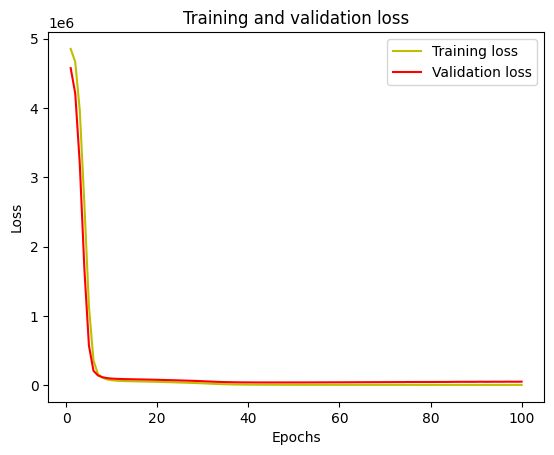

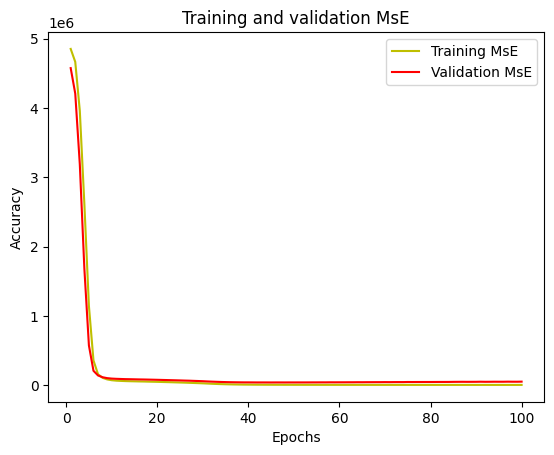

In [23]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mse']
val_acc = history.history['val_mse']
plt.plot(epochs, acc, 'y', label='Training MsE')
plt.plot(epochs, val_acc, 'r', label='Validation MsE')
plt.title('Training and validation MsE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
y_test

1070    1400.0
288     1600.0
1942     850.0
296     1850.0
1352    1600.0
         ...  
445      600.0
1598    1130.0
72       700.0
509     1850.0
1065     700.0
Name: ModalPrice, Length: 722, dtype: float64

In [25]:
y_pred = model.predict(x_test_scaled)
# y_test = scaler.inverse_transform(y_test)
# y_pred = scaler.inverse_transform(y_pred)
mean_squared_error(y_test, y_pred, squared=False)

23/23 [==============================] - 0s 2ms/step


224.02255316953944

MLP

In [26]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)
y_pred = regr.predict(x_test)
mean_squared_error(y_test, y_pred, squared=False)

421.1975354072984

RNN

In [27]:
def prep_data(datain,temp, time_step):
    # y_indices = np.arange(start=time_step, stop=len(datain), step=time_step)
    # print(type(temp))
    y_indices = np.arange(start=time_step, stop=len(datain), step=time_step)

    # y_tmp = datain[y_indices]

    y_tmp = np.array(temp)
    y_tmp = y_tmp.reshape(-1,1)
    rows_X = len(y_tmp)
    X_tmp = datain[range(time_step*rows_X)]
    # X_tmp = np.reshape(X_tmp, (rows_X, time_step, 1))
    X_tmp = np.reshape(X_tmp, (rows_X, time_step, 8))

    return X_tmp, y_tmp

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled=scaler.fit_transform(x_data)
# y_scaled = scaler.fit_transform(y_data)

# train_data, test_data = train_test_split(x_scaled, test_size=0.2, shuffle=False)

time_step = 1
# X_train, y_train = prep_data(train_data, time_step)
# X_test, y_test = prep_data(test_data, time_step)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size = 0.25, random_state=9)

X_train, Y_train = prep_data(x_train, y_train, time_step)
X_test, Y_test = prep_data(x_test,y_test, time_step)

In [29]:
print(x_data)

      Commodity  State  District  Market  Population  MinPrice  MaxPrice  \
0             0      0         0       0    13606753    1800.0    1900.0   
1             0      0         0       0    13606753     500.0    1000.0   
2             0      0         0       0    13606753     500.0     800.0   
3             0      0         0       0    13606753     500.0     800.0   
4             0      0         0       0    13606753     500.0     800.0   
...         ...    ...       ...     ...         ...       ...       ...   
2881          2      1         1       0     4038000    1800.0    1900.0   
2882          2      1         1       0     4038000    1850.0    1950.0   
2883          2      1         1       0     4038000    1850.0    1950.0   
2884          2      1         1       0     4038000    1800.0    1900.0   
2885          2      1         1       0     4038000    1800.0    1900.0   

      Total_Arrival  
0                 0  
1             29830  
2             54200  

In [30]:
print(X_train.shape)
print(Y_train.shape)

(2164, 1, 8)
(2164, 1)


In [31]:
# print(np.reshape(y_train,(273,1)).shape)
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)

In [31]:
model = Sequential(name="First-RNN-Model")
# model.add(Input(shape=(time_step,1), name='Input-Layer'))
model.add(Input(shape=(1,4), name='Input-Layer'))
model.add(SimpleRNN(units=1, activation='tanh', name='Hidden-Recurrent-Layer'))
model.add(Dense(units=1, activation='tanh', name='Hidden-Layer'))
model.add(Dense(units=1, activation='linear', name='Output-Layer'))

In [32]:
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['MeanSquaredError', 'MeanAbsoluteError'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance.
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )

In [ ]:
# history=model.fit(X_train, # input data
#           Y_train, # target data
#           batch_size=64, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
#           epochs=50, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
#           verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
#           callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
#           validation_split=0.0, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
#           validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch.
#           shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
#           class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
#           sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
#           initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
#           steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined.
#           validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
#           validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
#           validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
#           max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
#           workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
#           use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False.
#          )

In [33]:
y_pred.shape

(722,)

In [34]:
y_test.shape

(722,)

In [ ]:
# y_pred = model.predict(X_test)
# mean_squared_error(Y_test, y_pred, squared=False)

In [ ]:
# from matplotlib import pyplot as plt
# #plot the training and validation accuracy and loss at each epoch
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


# acc = history.history['mean_squared_error']
# val_acc = history.history['val_mean_squared_error']
# plt.plot(epochs, acc, 'b', label='Training MsE')
# plt.plot(epochs, val_acc, 'r', label='Validation MsE')
# plt.title('Training and validation MsE')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

Inception Time Model


In [43]:
pip install tensorflow

In [35]:
import numpy as np
import keras
# from keras.layers.core import Dense, Dropout, Activation, Flatten
# from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
# from keras.regularizers import l2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras import models
from tensorflow.keras.models import Model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import tensorflow

In [36]:
# nClasses = 1
nClasses = 1

# X, y = make_classification(n_samples=100000, n_features = 2304, n_informative = 200, n_classes = nClasses)
x_scaled=scaler.fit_transform(x_data)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size=0.25,random_state=42)
time_step = 1
#time_step = 7

X_train, Y_train = prep_data(x_train, y_train, time_step)
X_test, Y_test = prep_data(x_test,y_test, time_step)

In [37]:
print(X_train.shape)
print(Y_train.shape)

(2164, 1, 8)
(2164, 1)


In [38]:
y_data

0       1850.0
1        700.0
2        700.0
3        700.0
4        700.0
         ...  
2881    1850.0
2882    1900.0
2883    1900.0
2884    1850.0
2885    1850.0
Name: ModalPrice, Length: 2886, dtype: float64

In [39]:
shape_x = 1
shape_y = 8
# X_train = X_train.reshape(750,shape_x,shape_y,1)
# X_test = X_test.reshape(25000,shape_x,shape_y,1)

In [40]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from tensorflow.keras.utils import to_categorical


In [41]:

from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Input, Conv2D, LeakyReLU, MaxPooling2D, concatenate, LSTM, Reshape, Dense
from keras.callbacks import EarlyStopping

#import pandas_market_calendars as mcal

In [ ]:
# input_img = Input(shape=(shape_x, shape_y,1))


# bottle_neck = Conv2D(10, (1,1), padding='same',activation='relu')(input_img)
# bottle_neck = Conv2D(10, (1,1), padding='same',activation='relu')(bottle_neck)
# # ### 1st layer
# layer_1 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
# layer_1 = Conv2D(10, (3,3), padding='same', activation='relu')(layer_1)

# ### 2nd layer
# layer_2 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
# layer_2 = Conv2D(10, (5,5), padding='same', activation='relu')(layer_2)

# ### 3rd layer
# layer_3 = MaxPooling2D((4,4), strides=(1,1), padding='same')(input_img)
# layer_3 = Conv2D(10, (1,1), padding='same', activation='relu')(layer_3)

# ### Concatenate
# mid_1 = keras.layers.concatenate([bottle_neck,layer_1,layer_2, layer_3], axis = 3)

# flat_1 = Flatten()(mid_1)

# dense_1 = Dense(1200, activation='LeakyReLU')(flat_1)
# dense_2 = Dense(600, activation='LeakyReLU')(dense_1)
# dense_3 = Dense(150, activation='LeakyReLU')(dense_2)
# # print(dense_3.shape)
# # output = Dense(nClasses, activation='relu')(dense_3)

# # LSTM_output = LSTM(64)(dense_3)

# # print(LSTM_output.shape)

# # Fully Connected Layer with softmax activation function for output
# output = Dense(1, activation='relu')(dense_3)

In [ ]:
# model = Model([input_img], output)
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# X_train.shape

In [ ]:
# Y_train.shape

In [ ]:
# # model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
# #               loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
# #               metrics=['MeanSquaredError', 'MeanAbsoluteError'],
# #               validation_data=(x_test_scaled, y_test),# List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance.
# #               loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
# #               weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
# #               run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
# #               steps_per_execution=None)
# #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
#               loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
#               metrics=['MeanSquaredError', 'MeanAbsoluteError'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance.
#               loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
#               weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
#               run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
#               steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
#              )

# # batch_size = 512
# # epochs = 1
# # batch_size = 1024
# # epochs = 100

# history = model.fit(X_train, # input data
#           Y_train, # target data
#           batch_size=1, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
#           epochs=50, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
#           verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
#           callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
#           validation_split=0.0, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
#           validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch.
#           shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
#           class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
#           sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
#           initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
#           steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined.
#           validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
#           validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
#           validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
#           max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
#           workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
#           use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False.
#          )
# #history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

In [ ]:
# y_test.shape

In [ ]:
# y_pred.shape

In [ ]:
# y_pred = model.predict(X_test)
# mean_squared_error(Y_test, y_pred, squared=False)

In [ ]:
# from math import sqrt
# sqrt(mean_squared_error(Y_test,y_pred, squared=False))

In [ ]:
# from matplotlib import pyplot as plt
# #plot the training and validation accuracy and loss at each epoch
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


# acc = history.history['mean_squared_error']
# val_acc = history.history['val_mean_squared_error']
# plt.plot(epochs, acc, 'b', label='Training MsE')
# plt.plot(epochs, val_acc, 'r', label='Validation MsE')
# plt.title('Training and validation MsE')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()


In [42]:
input_tensor = Input(shape=(shape_x, shape_y, 1))

conv_filter_num=10
leaky_relu_alpha=0.1
inception_num=10

# Conv block1
conv_layer1 = Conv2D(10, (1,1), padding='same',activation='relu')(input_tensor)
print(conv_layer1.shape)
conv_layer1 =LeakyReLU(alpha=leaky_relu_alpha)(conv_layer1)
print(conv_layer1.shape)
conv_layer1 = Conv2D(10, (1,1), padding='same',activation='relu')(conv_layer1)
conv_first1 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer1)
print(conv_layer1.shape)
conv_layer1 = Conv2D(conv_filter_num, (3,1), padding='same',activation='relu')(conv_layer1)
conv_layer1 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer1)
print(conv_layer1.shape)

# Conv block2
conv_layer2 = Conv2D(conv_filter_num, (1,2), padding='same',activation='relu')(conv_layer1)
conv_layer2 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer2)
print(conv_layer2.shape)
conv_layer2 = Conv2D(conv_filter_num, (3,1), padding='same',activation='relu')(conv_layer2)
conv_layer2 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer2)
print(conv_layer2.shape)
conv_layer2 = Conv2D(conv_filter_num, (3,1), padding='same',activation='relu')(conv_layer2)
conv_layer2 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer2)
print(conv_layer2.shape)


# Conv block3
conv_layer3 = Conv2D(conv_filter_num, (1,10),padding='same',activation='relu')(conv_layer2)
conv_layer3 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer3)
print(conv_layer3.shape)
conv_layer3 = Conv2D(conv_filter_num, (3,1),padding='same',activation='relu')(conv_layer3)
conv_layer3 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer3)
print(conv_layer3.shape)
conv_layer3 = Conv2D(conv_filter_num, (3,1),padding='same',activation='relu')(conv_layer3)
conv_layer3 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer3)
print(conv_layer3.shape)

# Inception module
inception_module1 = Conv2D(inception_num, (1,1), padding='same')(conv_layer3)
inception_module1 = LeakyReLU(alpha=leaky_relu_alpha)(inception_module1)
print(inception_module1.shape)
inception_module1 = Conv2D(inception_num, (3,1), padding='same')(inception_module1)
inception_module1 = LeakyReLU(alpha=leaky_relu_alpha)(inception_module1)
print(inception_module1.shape)

inception_module2 = Conv2D(inception_num, (1,1), padding='same')(conv_layer3)
inception_module2 = LeakyReLU(alpha=leaky_relu_alpha)(inception_module2)
print(inception_module2.shape)
inception_module2 = Conv2D(inception_num, (5,1), padding='same')(inception_module2)
inception_module2 = LeakyReLU(alpha=leaky_relu_alpha)(inception_module2)
print(inception_module2.shape)

inception_module3 = MaxPooling2D((3,1), strides=(1,1), padding='same')(conv_layer3)
print(inception_module3.shape)
inception_module3 = Conv2D(inception_num, (1,1), padding='same')(inception_module3)
print(inception_module3.shape)
inception_module3 = LeakyReLU(alpha=leaky_relu_alpha)(inception_module3)
print(inception_module3.shape)

inception_module_final = concatenate([inception_module1, inception_module2, inception_module3], axis=3)
print(inception_module_final.shape)



(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 30)


In [43]:
flat_1 = Flatten()(inception_module_final)

dense_1 = Dense(1200, activation='LeakyReLU')(flat_1)
dense_2 = Dense(600, activation='LeakyReLU')(dense_1)
dense_3 = Dense(150, activation='LeakyReLU')(dense_2)
# print(dense_3.shape)
# output = Dense(nClasses, activation='relu')(dense_3)

# LSTM_output = LSTM(64)(dense_3)

# print(LSTM_output.shape)

# Fully Connected Layer with softmax activation function for output
output = Dense(1, activation='LeakyReLU')(dense_3)

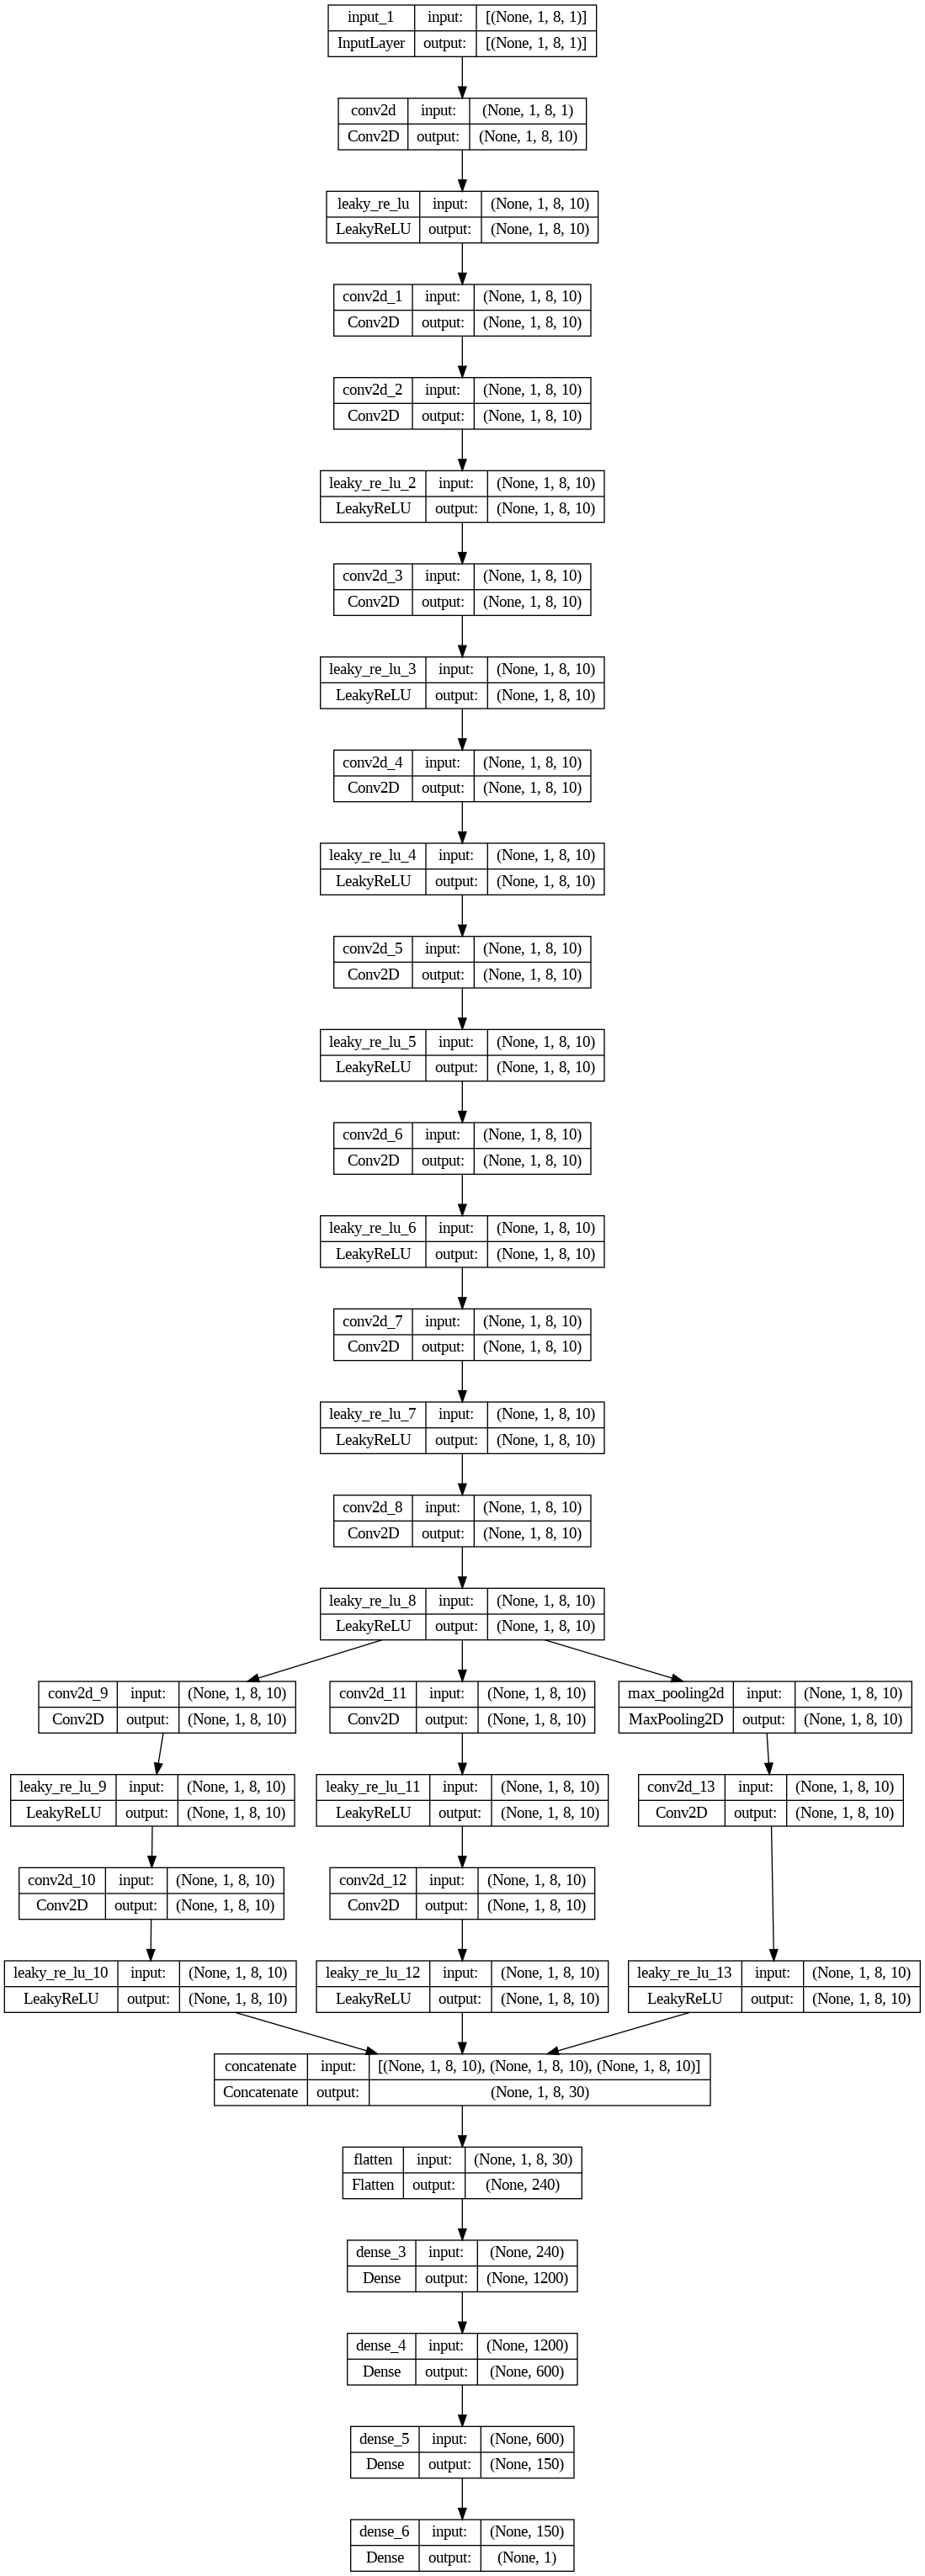

In [44]:
model = Model([input_tensor], output)
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [45]:
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['MeanSquaredError', 'MeanAbsoluteError'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance.
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )

# batch_size = 512
# epochs = 1
# batch_size = 1024
# epochs = 100

history = model.fit(X_train, # input data
          Y_train, # target data
          batch_size=32, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=50, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
          verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
          callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
          validation_split=0.0, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
          validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch.
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
          sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
          initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
          steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined.
          validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
          validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
          validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
          max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
          workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
          use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False.
         )

Epoch 1/50
68/68 [==============================] - 6s 35ms/step - loss: 3140363.0000 - mean_squared_error: 3140363.0000 - mean_absolute_error: 1174.7533 - val_loss: 1103633.8750 - val_mean_squared_error: 1103633.8750 - val_mean_absolute_error: 606.8770
Epoch 2/50
68/68 [==============================] - 3s 37ms/step - loss: 1872601.5000 - mean_squared_error: 1872601.5000 - mean_absolute_error: 738.8250 - val_loss: 1142466.6250 - val_mean_squared_error: 1142466.6250 - val_mean_absolute_error: 640.7761
Epoch 3/50
68/68 [==============================] - 2s 31ms/step - loss: 1852681.6250 - mean_squared_error: 1852681.6250 - mean_absolute_error: 740.0529 - val_loss: 1135637.1250 - val_mean_squared_error: 1135637.1250 - val_mean_absolute_error: 641.8467
Epoch 4/50
68/68 [==============================] - 2s 22ms/step - loss: 1822372.7500 - mean_squared_error: 1822372.7500 - mean_absolute_error: 750.4481 - val_loss: 1101538.0000 - val_mean_squared_error: 1101538.0000 - val_mean_absolute_err

In [46]:
y_pred = model.predict(X_test)
mean_squared_error(Y_test, y_pred, squared=False)

23/23 [==============================] - 1s 9ms/step


110.22053492388753

In [47]:
X_test

array([[[0.        , 0.        , 0.        , ..., 0.02871622,
         0.05882353, 0.98325976]],

       [[1.        , 1.        , 1.        , ..., 0.05658784,
         0.03897059, 0.01161609]],

       [[0.5       , 1.        , 1.        , ..., 0.10472973,
         0.08088235, 0.20939011]],

       ...,

       [[1.        , 1.        , 1.        , ..., 0.07516892,
         0.05514706, 0.02541149]],

       [[1.        , 0.        , 0.        , ..., 0.10472973,
         0.13235294, 0.02332168]],

       [[1.        , 0.        , 0.        , ..., 0.14695946,
         0.13970588, 0.01004511]]])

In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example input data
input_data = {
    'Date': ['2023-01-06'],  # Example date for prediction (not used in prediction)
    'Commodity': ['Onion'],  # Example value for Commodity
    'State': ['Karnataka'],  # Example value for State
    'District': ['Bangalore'],  # Example value for District
    'Market': [0],
    'Population': [13606753],
    'MinPrice':[500],  # Example value for MinPrice
    'MaxPrice': [800],  # Example value for MaxPrice
    'TotalArrival': [2983]  # Example value for TotalArrival
}

# Create a DataFrame from input_data
input_df = pd.DataFrame(input_data)

# Assuming these are the features your model expects
features = ['Commodity', 'State', 'District', 'Market', 'Population', 'MinPrice', 'MaxPrice', 'TotalArrival']

# Transform categorical columns using LabelEncoder
label_encoders = {}
for feature in features:
    le = LabelEncoder()
    input_df[feature] = le.fit_transform(input_df[feature])
    label_encoders[feature] = le

# Convert input_df to numpy array and reshape
input_array = input_df[features].to_numpy().reshape(-1, 1, len(features), 1)

# Now you can use input_array to predict with your Keras model
predicted_total_arrival = model.predict(input_array)



1/1 [==============================] - 0s 34ms/step


In [56]:
print(predicted_total_arrival)

[[-267.14246]]


In [51]:
import joblib

# Train your model here using your training data

# Save the trained model to a file
joblib.dump(model, 'your_model_filename.pkl')
# Load the saved model from the file
loaded_model = joblib.load('your_model_filename.pkl')

# Now you can use loaded_model for prediction with different input data
predicted_total_arrival = loaded_model.predict(input_array)


1/1 [==============================] - 0s 359ms/step


In [52]:
print(predicted_total_arrival)

[[-267.14246]]


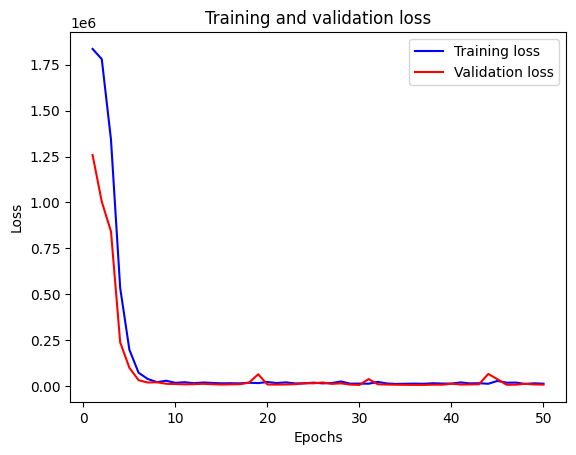

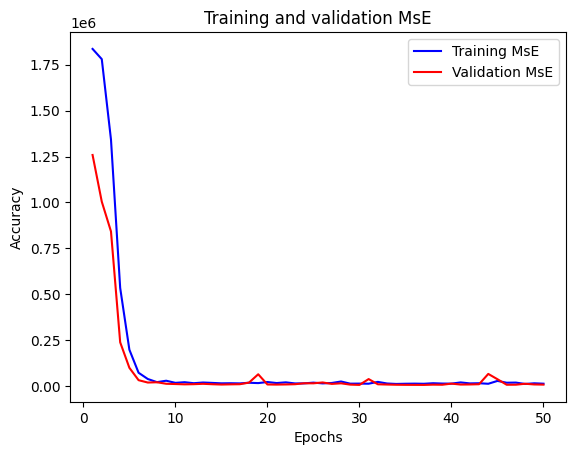

In [143]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
plt.plot(epochs, acc, 'b', label='Training MsE')
plt.plot(epochs, val_acc, 'r', label='Validation MsE')
plt.title('Training and validation MsE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


LSTM Model


In [144]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM


In [ ]:
# model = Sequential()
# model.add(LSTM(600, input_shape=(1,6), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(600))
# model.add(Dropout(0.2))
# model.add(Dense(units=1, activation='tanh', name='Hidden-Layer'))

# # model.add(Dense(units=1, activation='tanh', name='Hidden-Layer'))
# model.add(Dense(units=1, activation='linear', name='Output-Layer'))

# model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
#               loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
#               metrics=['MeanSquaredError', 'MeanAbsoluteError'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance.
#               loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
#               weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
#               run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
#               steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
#              )

In [ ]:
# history=model.fit(X_train, # input data
#           Y_train, # target data
#           batch_size=1, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
#           epochs=50, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
#           verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
#           callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
#           validation_split=0.0, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
#           validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch.
#           shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
#           class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
#           sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
#           initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
#           steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined.
#           validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
#           validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
#           validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
#           max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
#           workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
#           use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False.
#          )

In [ ]:
# y_pred.shape

In [ ]:
# y_test.shape

In [ ]:
# y_pred = model.predict(X_test)
# mean_squared_error(Y_test, y_pred, squared=False)

In [ ]:
# from matplotlib import pyplot as plt
# #plot the training and validation accuracy and loss at each epoch
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


# acc = history.history['mean_squared_error']
# val_acc = history.history['val_mean_squared_error']
# plt.plot(epochs, acc, 'b', label='Training MsE')
# plt.plot(epochs, val_acc, 'r', label='Validation MsE')
# plt.title('Training and validation MsE')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

Model with LSTM



In [ ]:
# input_img = Input(shape=(shape_x, shape_y, 1))


# bottle_neck = Conv2D(10, (1,1), padding='same',activation='relu')(input_img)
# bottle_neck = LeakyRelu(alpha=leaky_relu_alpha)(bottle_neck)
# # ### 1st layer
# layer_1 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
# layer_1 = LeakyRelu(alpha=leaky_relu_alpha)(layer_1)

# ### 2nd layer
# layer_2 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
# layer_2 = LeakyRelu(alpha=leaky_relu_alpha)(layer_2)

# ### 3rd layer
# layer_3 = MaxPooling2D((4,4), strides=(1,1), padding='same')(input_img)
# layer_3 = LeakyRelu(alpha=leaky_relu_alpha)(layer_3)

# ### Concatenate
# mid_1 = keras.layers.concatenate([bottle_neck,layer_1,layer_2, layer_3], axis = 3)

# flat_1 = Flatten()(mid_1)

# dense_1 = Dense(1200, activation='LeakyReLU')(flat_1)
# dense_2 = Dense(600, activation='LeakyReLU')(dense_1)
# dense_3 = Dense(150, activation='LeakyReLU')(dense_2)

# output = Dense(nClasses, activation='relu')(dense_3)

In [145]:
# from keras.utils import np_utils
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Input, Conv2D, LeakyReLU, MaxPooling2D, concatenate, LSTM, Reshape, Dense
from keras.callbacks import EarlyStopping

#import pandas_market_calendars as mcal

In [146]:
def block_conv(a,b,c,d,e,f,input_tensor):
  conv_layer1 = Conv2D(10, (a,b), padding='same',activation='relu')(input_tensor)
  print(conv_layer1.shape)
  conv_layer1 =LeakyReLU(alpha=leaky_relu_alpha)(conv_layer1)
  print(conv_layer1.shape)
  conv_layer1 = Conv2D(10, (c,d), padding='same',activation='relu')(conv_layer1)
  conv_first1 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer1)
  print(conv_layer1.shape)
  conv_layer1 = Conv2D(conv_filter_num, (e,f), padding='same',activation='relu')(conv_layer1)
  conv_layer1 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer1)
  print(conv_layer1.shape)
  return conv_layer1

In [147]:
input_tensor = Input(shape=(shape_x, shape_y,1))

conv_filter_num=10
leaky_relu_alpha=0.1
inception_num=10
# Conv block1
print(input_tensor.shape)
# conv_layer1 = Conv2D(10, (1,1), padding='same',activation='relu')(input_tensor)
# print(conv_layer1.shape)
# conv_layer1 =LeakyReLU(alpha=leaky_relu_alpha)(conv_layer1)
# print(conv_layer1.shape)
# conv_layer1 = Conv2D(10, (1,1), padding='same',activation='relu')(conv_layer1)
# conv_first1 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer1)
# print(conv_layer1.shape)
# conv_layer1 = Conv2D(conv_filter_num, (3,1), padding='same',activation='relu')(conv_layer1)
# conv_layer1 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer1)
# print(conv_layer1.shape)

conv_layer1 = block_conv(1,1,1,1,3,1,input_tensor)

# Conv block2
# conv_layer2 = Conv2D(conv_filter_num, (1,2), padding='same',activation='relu')(conv_layer1)
# conv_layer2 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer2)
# print(conv_layer2.shape)
# conv_layer2 = Conv2D(conv_filter_num, (3,1), padding='same',activation='relu')(conv_layer2)
# conv_layer2 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer2)
# print(conv_layer2.shape)
# conv_layer2 = Conv2D(conv_filter_num, (3,1), padding='same',activation='relu')(conv_layer2)
# conv_layer2 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer2)
# print(conv_layer2.shape)

conv_layer2 = block_conv(1,2,3,1,3,1,conv_layer1)
# Conv block3
# conv_layer3 = Conv2D(conv_filter_num, (1,10),padding='same',activation='relu')(conv_layer2)
# conv_layer3 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer3)
# print(conv_layer3.shape)
# conv_layer3 = Conv2D(conv_filter_num, (3,1),padding='same',activation='relu')(conv_layer3)
# conv_layer3 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer3)
# print(conv_layer3.shape)
# conv_layer3 = Conv2D(conv_filter_num, (3,1),padding='same',activation='relu')(conv_layer3)
# conv_layer3 = LeakyReLU(alpha=leaky_relu_alpha)(conv_layer3)
# print(conv_layer3.shape)

conv_layer3 = block_conv(1,10,3,1,3,1,conv_layer2)


conv_layer_final = concatenate([conv_layer1, conv_layer2, conv_layer3], axis=3)
conv_layer_final2 = conv_layer_final
conv_layer_final = Reshape((conv_layer_final.shape[2], conv_layer_final.shape[3]))(conv_layer_final)
LSTM_output1= LSTM(64)(conv_layer_final)
# LSTM_output1 = Reshape()
# Inception module
inception_module1 = Conv2D(inception_num, (1,1), padding='same',activation='relu')(conv_layer_final2)
inception_module1 = LeakyReLU(alpha=leaky_relu_alpha)(inception_module1)
print(inception_module1.shape)
inception_module1 = Conv2D(inception_num, (3,1), padding='same',activation='relu')(inception_module1)
inception_module1 = LeakyReLU(alpha=leaky_relu_alpha)(inception_module1)
print(inception_module1.shape)

inception_module2 = Conv2D(inception_num, (1,1), padding='same',activation='relu')(conv_layer3)
inception_module2 = LeakyReLU(alpha=leaky_relu_alpha)(inception_module2)
print(inception_module2.shape)
inception_module2 = Conv2D(inception_num, (5,1), padding='same',activation='relu')(inception_module2)
inception_module2 = LeakyReLU(alpha=leaky_relu_alpha)(inception_module2)
print(inception_module2.shape)

inception_module3 = MaxPooling2D((3,1), strides=(1,1), padding='same')(conv_layer3)
print(inception_module3.shape)
inception_module3 = Conv2D(inception_num, (1,1), padding='same',activation='relu')(inception_module3)
print(inception_module3.shape)
inception_module3 = LeakyReLU(alpha=leaky_relu_alpha)(inception_module3)
print(inception_module3.shape)

inception_module_final = concatenate([inception_module1, inception_module2, inception_module3], axis=3)
print(inception_module_final.shape)
#flat_1 = Flatten()(inception_module_final)

inception_module_final = Reshape((inception_module_final.shape[2], inception_module_final.shape[3]))(inception_module_final)
print(inception_module_final.shape)
flat_1 = Flatten()(inception_module_final)
# LSTM
LSTM_output2 = LSTM(64)(inception_module_final)
print(LSTM_output2.shape)
Final_layer = concatenate([inception_module_final,conv_layer_final])
LSTM_output = LSTM(64)(Final_layer)
# Fully Connected Layer with softmax activation function for output
model_output = Dense(1, activation='LeakyReLU')(LSTM_output)
print(model_output.shape)

(None, 1, 8, 1)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 10)
(None, 1, 8, 30)
(None, 8, 30)
(None, 64)
(None, 1)


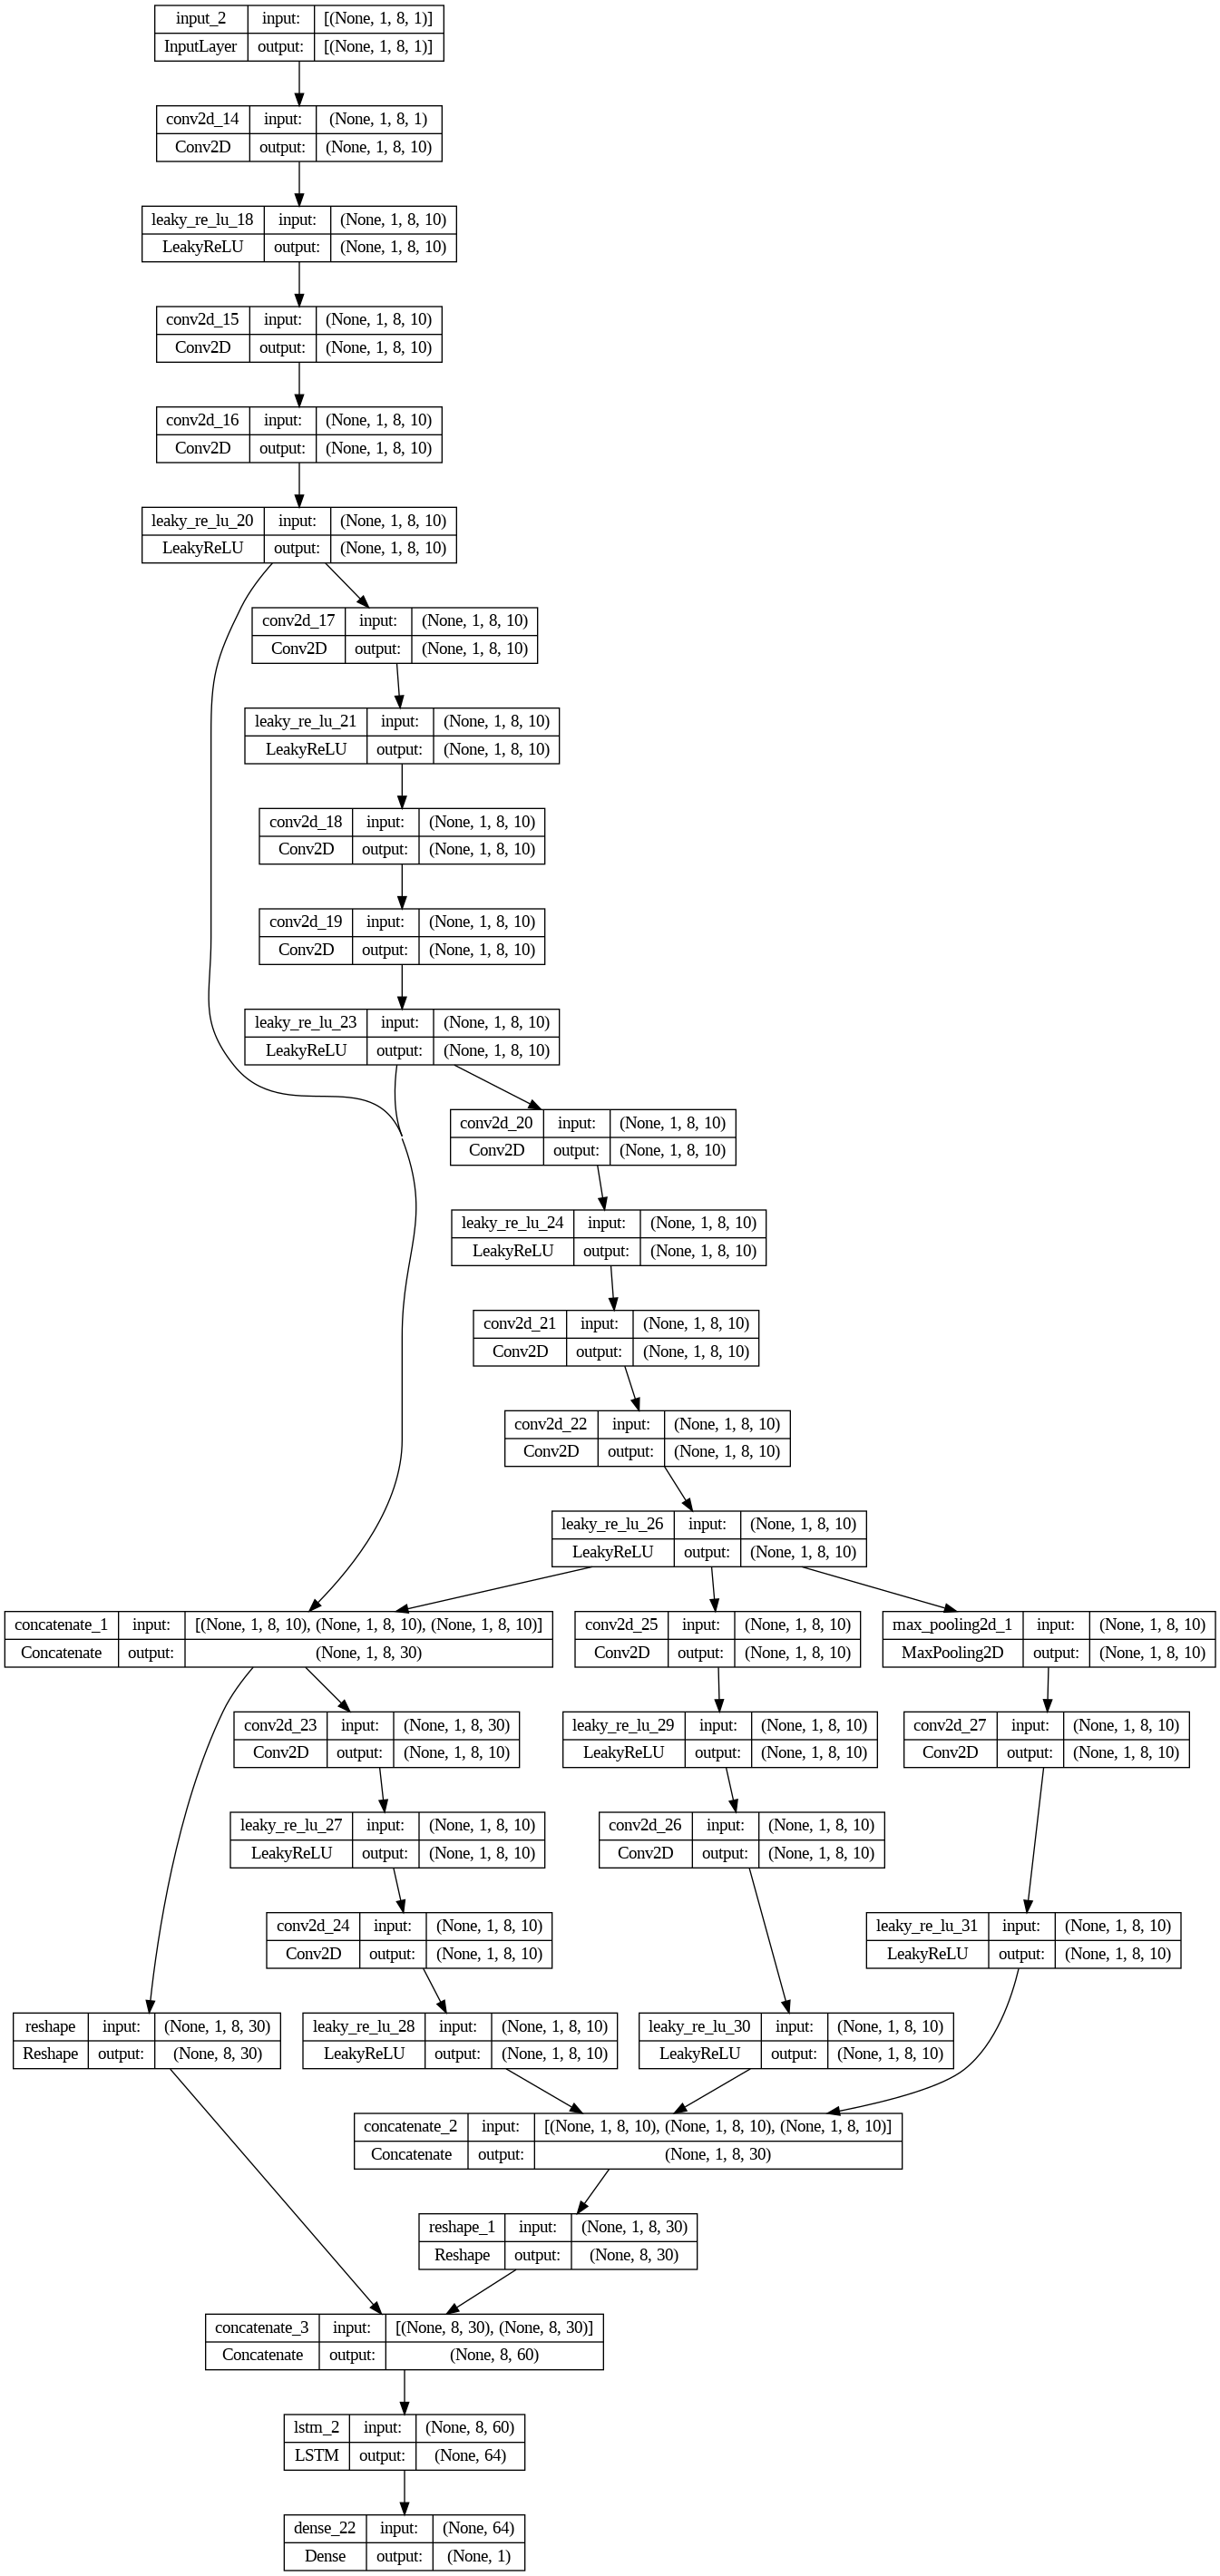

In [148]:
model1 = Model([input_tensor], model_output)
plot_model(model1, to_file='model.png', show_shapes=True, show_layer_names=True)

In [149]:
model1.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['MeanSquaredError', 'MeanAbsoluteError'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance.
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )

# batch_size = 512
# epochs = 1
# batch_size = 1024
# epochs = 100

history = model1.fit(X_train, # input data
          Y_train, # target data
          batch_size=64, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=50, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
          verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
          callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
          validation_split=0.0, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
          validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch.
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
          sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
          initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
          steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined.
          validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
          validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
          validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
          max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
          workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
          use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False.
         )

Epoch 1/50
34/34 [==============================] - 7s 42ms/step - loss: 5101025.0000 - mean_squared_error: 5101025.0000 - mean_absolute_error: 1800.4370 - val_loss: 3892462.2500 - val_mean_squared_error: 3892462.2500 - val_mean_absolute_error: 1669.0828
Epoch 2/50
34/34 [==============================] - 1s 19ms/step - loss: 5065118.0000 - mean_squared_error: 5065118.0000 - mean_absolute_error: 1790.4740 - val_loss: 3874605.0000 - val_mean_squared_error: 3874605.0000 - val_mean_absolute_error: 1663.7222
Epoch 3/50
34/34 [==============================] - 1s 20ms/step - loss: 5052019.5000 - mean_squared_error: 5052019.5000 - mean_absolute_error: 1786.8269 - val_loss: 3864843.2500 - val_mean_squared_error: 3864843.2500 - val_mean_absolute_error: 1660.7859
Epoch 4/50
34/34 [==============================] - 1s 19ms/step - loss: 5042145.0000 - mean_squared_error: 5042145.0000 - mean_absolute_error: 1784.0386 - val_loss: 3855983.0000 - val_mean_squared_error: 3855983.0000 - val_mean_absolu

In [150]:
y_pred = model1.predict(X_test)
mean_squared_error(Y_test, y_pred, squared=False)

23/23 [==============================] - 1s 5ms/step


1878.119241605678

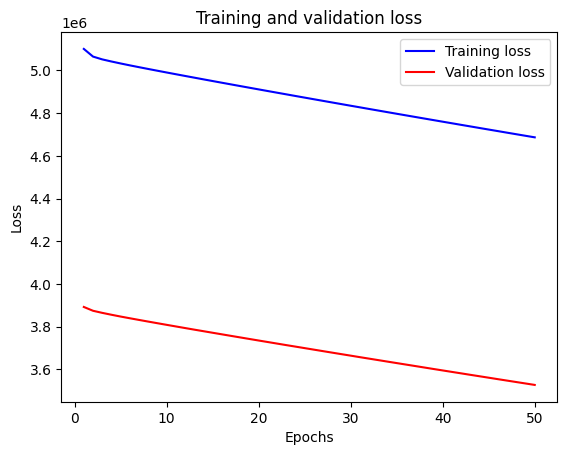

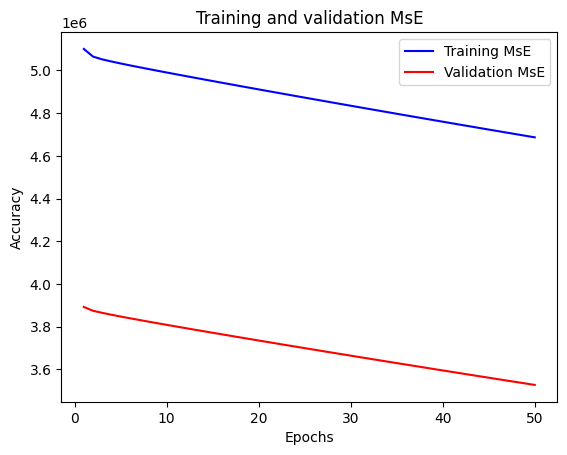

In [151]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
plt.plot(epochs, acc, 'b', label='Training MsE')
plt.plot(epochs, val_acc, 'r', label='Validation MsE')
plt.title('Training and validation MsE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Inception Model with transformer


In [76]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:

# def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
#     # Normalization and Attention
#     x = layers.LayerNormalization(epsilon=1e-6)(inputs)
#     x = layers.MultiHeadAttention(
#         key_dim=head_size, num_heads=num_heads, dropout=dropout
#     )(x, x)
#     x = layers.Dropout(dropout)(x)
#     res = x + inputs

#     # Feed Forward Part
#     x = layers.LayerNormalization(epsilon=1e-6)(res)
#     x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
#     x = layers.Dropout(dropout)(x)
#     x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
#     return x + res


In [ ]:
n_classes=1

In [ ]:
# def build_model(
#     input_shape,
#     head_size,
#     num_heads,
#     ff_dim,
#     num_transformer_blocks,
#     mlp_units,
#     dropout=0,
#     mlp_dropout=0,
# ):
#     inputs = Input(shape=(1,6,1))
#     x = inputs
#     for _ in range(num_transformer_blocks):
#         x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

#     x = layers.GlobalAveragePooling2D(data_format="channels_first")(x)
#     for dim in mlp_units:
#         x = layers.Dense(dim, activation="relu")(x)
#         x = layers.Dropout(mlp_dropout)(x)
#     outputs = layers.Dense(n_classes, activation="softmax")(x)
#     return keras.Model(inputs, outputs)


In [ ]:
# input_shape=1
# model = build_model(
#     input_shape,
#     head_size=256,
#     num_heads=4,
#     ff_dim=6,
#     num_transformer_blocks=4,
#     mlp_units=[128],
#     mlp_dropout=0.4,
#     dropout=0.25,
# )

In [ ]:
# model.compile( # default='rmsprop', an algorithm to be used in backpropagation
#               loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
#               metrics=['MeanSquaredError', 'MeanAbsoluteError'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance.
#               loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
#               weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
#               run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
#               steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
#              )

In [ ]:
# history = model.fit(X_train, # input data
#           Y_train, # target data
#           batch_size=64, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
#           epochs=50, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
#           verbose=1, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
#           callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
#           validation_split=0.0, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
#           validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch.
#           shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
#           class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
#           sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
#           initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
#           steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined.
#           validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
#           validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
#           validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
#           max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
#           workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
#           use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False.
#          )

Epoch 1/50
5/5 [==============================] - 9s 303ms/step - loss: 27.1808 - mean_squared_error: 27.1808 - mean_absolute_error: 4.5383 - val_loss: 23.4993 - val_mean_squared_error: 23.4993 - val_mean_absolute_error: 4.1168
Epoch 2/50
5/5 [==============================] - 0s 91ms/step - loss: 27.1808 - mean_squared_error: 27.1808 - mean_absolute_error: 4.5383 - val_loss: 23.4993 - val_mean_squared_error: 23.4993 - val_mean_absolute_error: 4.1168
Epoch 3/50
5/5 [==============================] - 0s 94ms/step - loss: 27.1808 - mean_squared_error: 27.1808 - mean_absolute_error: 4.5383 - val_loss: 23.4993 - val_mean_squared_error: 23.4993 - val_mean_absolute_error: 4.1168
Epoch 4/50
5/5 [==============================] - 0s 94ms/step - loss: 27.1808 - mean_squared_error: 27.1808 - mean_absolute_error: 4.5383 - val_loss: 23.4993 - val_mean_squared_error: 23.4993 - val_mean_absolute_error: 4.1168
Epoch 5/50
5/5 [==============================] - 0s 98ms/step - loss: 27.1808 - mean_squar

In [ ]:
# y_pred = model.predict(X_test)
# mean_squared_error(Y_test, y_pred, squared=False)

3/3 [==============================] - 1s 18ms/step


4.847611898795528

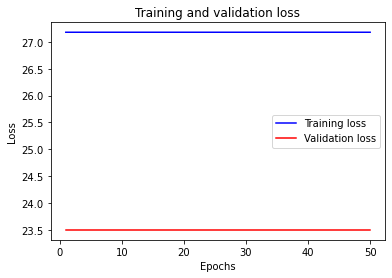

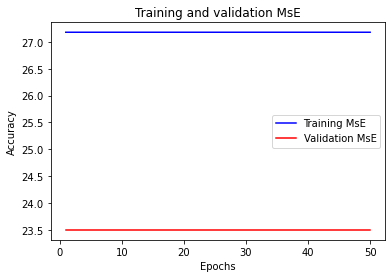

In [ ]:
# from matplotlib import pyplot as plt
# #plot the training and validation accuracy and loss at each epoch
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


# acc = history.history['mean_squared_error']
# val_acc = history.history['val_mean_squared_error']
# plt.plot(epochs, acc, 'b', label='Training MsE')
# plt.plot(epochs, val_acc, 'r', label='Validation MsE')
# plt.title('Training and validation MsE')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [ ]:
import pickle
import os
from sklearn.model_selection import train_test_split
import numpy as np
import torch

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
import torch.nn as nn

#model definition
class Net(nn.Module):
    def __init__(self,n_channels, time_steps, ff_dim, n_head, n_classes, n_layers, dropout, device):
        super(Net, self).__init__()

        self.transformer_model = nn.Transformer(d_model=n_channels, nhead=n_head, num_encoder_layers=n_layers,
                                                num_decoder_layers=n_layers, dim_feedforward=ff_dim, batch_first=True,dropout=dropout,device=device)
        self.fc = nn.Linear(time_steps*n_channels, n_classes)
        self.time_steps = time_steps
        self.n_channels = n_channels

    def forward(self, x):

        x = self.transformer_model(x,x)
        x = x.view(-1,self.time_steps*self.n_channels)
        x = self.fc(x)

        return x

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cpu


In [ ]:
X_train = torch.Tensor(X_train).to(device)
X_test = torch.Tensor(X_test).to(device)
# y_train = torch.Tensor(y_train).reshape(-1).to(device)
# y_test = torch.Tensor(y_test).reshape(-1).to(device)


In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

In [ ]:
class Params(object):

    def __init__(self, X_train):

        self.n_channels = len(X_train[0][0])
        self.time_steps = len(X_train[0])
        self.ff_dim = 32
        self.n_head = 3
        self.dropout = 0.1
        self.n_classes = 3
        self.n_layers = 6
        self.batch_size = 64
        self.n_epochs = 1100
        self.learning_rate = 0.001

In [ ]:
train_dataset = TensorDataset(X_train,  y_train)
test_dataset = TensorDataset(X_test,  y_test)

train_dataloader = DataLoader(dataset=train_dataset, batch_size=params.batch_size, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=params.batch_size, shuffle=False)

lossfn = nn.CrossEntropyLoss()

model = Net(params.n_channels,params.time_steps, params.ff_dim,params.n_head,params.n_classes,params.n_layers,params.dropout, device)
model.to(device)
optimizer= optim.Adam(model.parameters(), lr= params.learning_rate)

train(model,params.n_epochs,train_dataloader,optimizer,lossfn,test_dataloader)

TypeError: ignored